<a href="https://colab.research.google.com/github/charan1817/project/blob/main/project_fake_news_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [63]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/sample_data/train.csv')

In [64]:
news_dataset.shape

(20800, 5)

In [65]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/sample_data/train.csv')

#Let's visualize the proportion of real and fake news!
#real vs fake
fig = px.pie(df, names='label', title='Proportion of Real vs. Fake News')
fig.show()

1    10413
0    10387
Name: label, dtype: int64


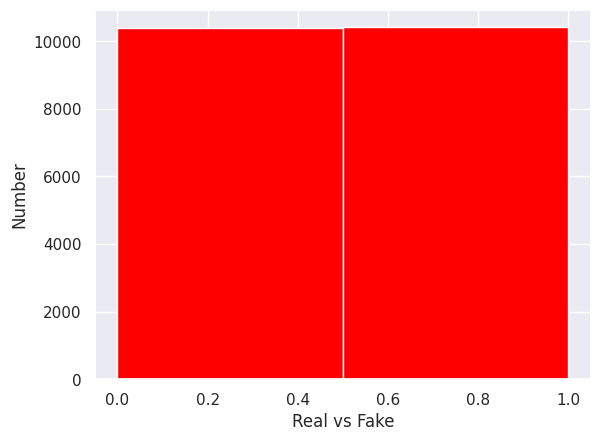

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

news_dataset = pd.read_csv('/content/sample_data/train.csv')

print(news_dataset['label'].value_counts())

plt.hist(news_dataset['label'], color='red', edgecolor='white', bins=2)
plt.xlabel('Real vs Fake')
plt.ylabel('Number')
plt.show()

In [67]:
print(df.columns)

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [68]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [69]:
# print the last 5 rows of the dataframe
news_dataset.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [70]:
# counting the number of missing values in the each column of the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [71]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [72]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [73]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [74]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [75]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [94]:
port_stem = PorterStemmer()

In [95]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [97]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [98]:
print(news_dataset['content'])

0        darrel lucu hou dem aid even see comey letter ...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exerci b...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [99]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [100]:
print(X)

['darrel lucu hou dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exerci balkan'
 'david swanson keep f aliv']


In [101]:
print(Y)

[1 0 1 ... 0 1 1]


In [102]:
Y.shape

(20800,)

In [103]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [104]:
print(X)

  (0, 15553)	0.28485063562728646
  (0, 13348)	0.2565896679337957
  (0, 8822)	0.3635963806326075
  (0, 8546)	0.29212514087043684
  (0, 7612)	0.24785219520671603
  (0, 6930)	0.21874169089359144
  (0, 4917)	0.233316966909351
  (0, 3759)	0.2705332480845492
  (0, 3567)	0.3598939188262559
  (0, 2933)	0.2468450128533713
  (0, 2464)	0.3676519686797209
  (0, 263)	0.27010124977708766
  (1, 16656)	0.3025156488372128
  (1, 6744)	0.19152496072048605
  (1, 5440)	0.7186013955384664
  (1, 3535)	0.2653147533915268
  (1, 2790)	0.19208753385709676
  (1, 2206)	0.36915639258038363
  (1, 1877)	0.15614790568229528
  (1, 1481)	0.2957471154505952
  (2, 15478)	0.41544962664721613
  (2, 9532)	0.49351492943649944
  (2, 5903)	0.3474613386728292
  (2, 5326)	0.3866530551182615
  (2, 3072)	0.46097489583229645
  :	:
  (20797, 12998)	0.2483705036831893
  (20797, 12227)	0.27276402145717243
  (20797, 12022)	0.24790022252744132
  (20797, 10216)	0.0804189541935242
  (20797, 9500)	0.17463635692029988
  (20797, 9431)	0.29394

Splitting the dataset to training & test data

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Training the Model: Logistic Regression

In [108]:
model = LogisticRegression()

In [109]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [110]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

Making a Predictive System

In [111]:
X_new = X_test[39]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real
